# Categorical Data

Categorical data considers numerical quantities in the context of categorical variables. Surveys, like the ones we see on the television show <a target="_blank" href="https://www.youtube.com/watch?v=qqtB4Romq5Y&list=PLAnv4_rGsTE7hsFYS_jyYScpyRr_QjwEY">Family Feud</a> or the frequency of people with various eye colors, are examples of categorical data. 


In this chapter, there are two types of categorical data that we consider: ordinal data and nominal data. 

**Ordinal data** consists of data that can be described as having a meaningful order, ranking, or relationship between categories. An inventory that quantifies the number of small, medium, and large shirts in stock is an example of ordinal data because there is a ranked relationship between shirt sizes.

**Nominal data** can be described as named categories that have no meaningful relationship to one another. Counting the number of people with black, brunette, red, and blonde hair colors in a room is an example of nominal data because hair color has no inherit meaning amongst each other - one hair color is not greater than or less than the others.


Categorical data can be visualized using bar graphs and pie charts, and in this section, we will practice making such visualizations.

Again, we'll load the necessary libraries and data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

plt.style.use('fast')

military = pd.read_csv("../../data/NorthAmerica_Military_USD-PercentGDP_Combined.csv", index_col='Year')

military

,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP,CAN-USD,MEX-USD,USA-USD
Year,,,,,,
1960,4.185257,0.673509,8.993125,1.702443,0.084000,47.346553
1961,4.128312,0.651780,9.156031,1.677821,0.086400,49.879771
1962,3.999216,0.689655,9.331673,1.671314,0.099200,54.650943
1963,3.620650,0.718686,8.831891,1.610092,0.112000,54.561216
1964,3.402063,0.677507,8.051281,1.657457,0.120000,53.432327
...,...,...,...,...,...,...
2016,1.164162,0.495064,3.418942,17.782776,5.336876,639.856443
2017,1.351602,0.436510,3.313381,22.269696,5.062077,646.752927
2018,1.324681,0.477517,3.316249,22.729328,5.839521,682.491400


## Bar graphs

Bar graphs are a popular method to visualize categorical data. They're simple, concise, and can condense
large and complex datasets into a simple visual summary. Most bar graphs depict a categorical element as an
independent variable on the x-axis while the height of the bar corresponds to a numerical value on the y-axis.

We will practice making bar graphs using our military dataset in the context of an ordinal variable.

First, let's create a graph to examine the percent of the GDP spent on the military in Canada. We will look at the years 2018, 2019 and 2020.

To do this, we must extract the data for the years of interest from the column containing the data pertaining to GDP percentage of military spending in Canada. We will call this `can_gdp`.


In [2]:
can_gdp = military.loc[[2018, 2019, 2020], ['CAN-PercentGDP']]

can_gdp

,CAN-PercentGDP
Year,
2018,1.324681
2019,1.278941
2020,1.415056


To make a bar graph from a DataFrame, the `plot.bar()` method can be used. We will use this method on `can_gdp`:

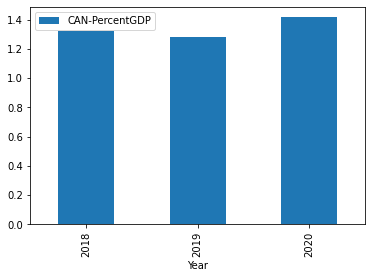

In [3]:
can_gdp.plot.bar()
plt.show()

We can also use `plt.bar()` to create a bar graph using the `pyplot` library. The `plt.bar()` function needs two arguments. The first argument, `x`, is an array of values to be plotted on the x-axis. 

The second argument, `height`, determines the height of the bars (the y-values). 

We will create a list of our years of interest and call it `year_labels` to input as the first argument and use the `CAN-PercentGDP` column of `can_gdp` as our second argument.

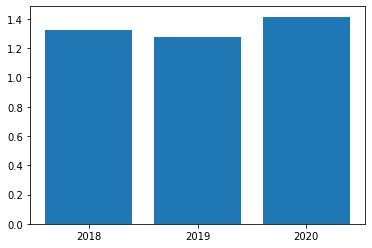

In [4]:
year_labels = ['2018', '2019', '2020']
plt.bar(year_labels, can_gdp["CAN-PercentGDP"])
plt.show()

The above code produced a plot, but this plot needs more descriptive labeling to help others understand the data. 

We need to add axis labels and a title to communicate what is being measured. Aesthetically, we can also reduce the width of each bar to give more room on the graph and more rest for our eyes.

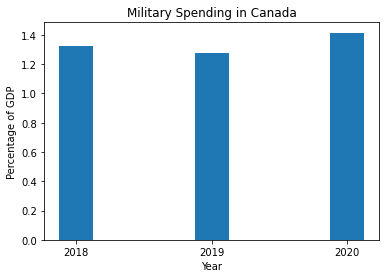

In [5]:
plt.bar(year_labels, can_gdp["CAN-PercentGDP"], width=0.25)


plt.title('Military Spending in Canada')

plt.ylabel('Percentage of GDP')
plt.xlabel('Year')

plt.show()

This plot looks better and is a lot more descriptive.

Let's add the data from Mexico and the United States.

To do this, we will once again use the `plt.subplots()` function. This time, we will specify our figure with a single axis called `ax`. Because we want to group our data by year, we can call `ax.bar()` to set precise positions on the x-axis for each country.

We will also use `plt.tight_layout()` to automatically adjust the subplot dimensions to give appropriate spacing between the bars and the axes boundaries.

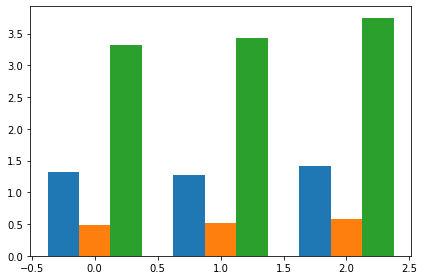

In [6]:
can_gdp = military.loc[[2018, 2019, 2020], ['CAN-PercentGDP']]
mex_gdp = military.loc[[2018, 2019, 2020], ['MEX-PercentGDP']]
usa_gdp = military.loc[[2018, 2019, 2020], ['USA-PercentGDP']]

index = np.arange(len(year_labels))

(fig, ax) = plt.subplots()

# Offsets the bars for Canada by -0.25in
ax.bar(index - 0.25, can_gdp["CAN-PercentGDP"], width=0.25) 

# Plots the bars for Mexico in the middle
ax.bar(index, mex_gdp["MEX-PercentGDP"], width=0.25)

# Offsets the bars for the U.S. by +0.25in
ax.bar(index + 0.25, usa_gdp["USA-PercentGDP"], width=0.25)

plt.tight_layout()

plt.show()

We were able to create a bar plot with all three data sets together. Now, let's add the appropriate titles, axis labels, and other details using previously described functions.

If we assign each country's bar to a variable, we can also label each individual bar with the associated numerical value by calling the `bar_label()` method on `ax`. In order to label the bars, the label must be specified when creating each each bar.

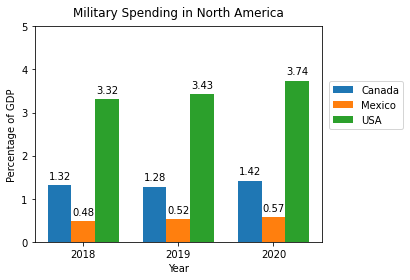

In [22]:
(fig, ax) = plt.subplots()


# Creates variable for each country and offsets as appropriate
# Annotates bar with the associated value, rounded to 2 places after the decimal
can_bar = ax.bar(index - 0.25, can_gdp["CAN-PercentGDP"].round(decimals=2), width=0.25, label='Canada') 
mex_bar = ax.bar(index, mex_gdp["MEX-PercentGDP"].round(decimals=2), width=0.25, label='Mexico')
usa_bar = ax.bar(index + 0.25, usa_gdp["USA-PercentGDP"].round(decimals=2), width=0.25, label='USA')


# Add labels and titles for entire figure
plt.title("Military Spending in North America", pad=10)
plt.ylabel('Percentage of GDP')
plt.xlabel('Year')
plt.xticks(index, year_labels)
plt.ylim(0, 5)


# Creates legend for the entire figure
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.5))


# Add labels for individual bars; gives spacing (padding) between the value and the bar
ax.bar_label(can_bar, label_type="edge", padding=4)
ax.bar_label(mex_bar, label_type="edge", padding=4)
ax.bar_label(usa_bar, label_type="edge", padding=4)


plt.tight_layout()

plt.show()

Great! Now we have a well annotated, visually appealing graph that depicts an important message about the data: the percentage of the GDP spent on the military for each country for the years 2018-2020.

From this graph, we can easily see that during this time period, Canada and Mexico contribute a smaller proportion of their GDP to military spending than the United States. This may not have been easily discernible by just looking at our large data table.

### Horizontal Bar Graphs

There may be times when you want to present data as a horizontal bar graph. Using the dollar amounts spent in 2020 for each North American country, we can create a horizontal bar graph to represent nominal data. First, we need to extract the data for the year of 2020:

In [15]:
year2020 = military.loc[[2020]][['CAN-USD', 'MEX-USD', 'USA-USD']]

From this, we obtain a DataFrame with a single row of data with values for three variables. To format this data for plotting, we can tranpose the DataFrame using the `transpose()` method:

In [16]:
year2020 = year2020.transpose()
year2020

Year,2020
CAN-USD,22.754847
MEX-USD,6.116377
USA-USD,778.232200


The DataFrame in this format can directly be used for plotting. To create a horiztonal bar graph, we can use the `plt.barh()` function. This function requires arguments for the `y` and `width` parameters. The `y` parameter is the categorical variables to be plotted, which are usually displayed on the x-axis of a regular bar graph. The `width` parameter corresponds to the numerical values that are associated with each categorical variable.

We will use the index of the `year2020` DataFrame as the an argument for the `y` parameter and the values in the `2020` column as an argument for the `width` parameter:

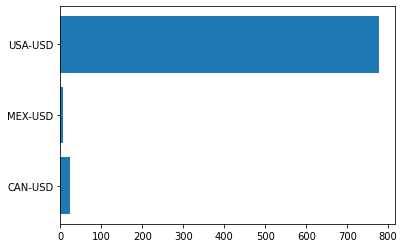

In [17]:
plt.barh(y = year2020.index, width = year2020[2020])
plt.show()

In the above graph, the index is used to label the categories on the y-axis. If desired, this can be changed by using a list of the same size as an argument for the `tick_label` parameter. Additional titling and labeling can be added to this graph as well:

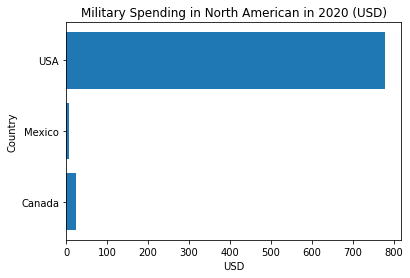

In [18]:
plt.barh(y = year2020.index, width = year2020[2020], tick_label = ['Canada', 'Mexico', 'USA'])
plt.title('Military Spending in North American in 2020 (USD)')
plt.xlabel('USD')
plt.ylabel('Country')
plt.show()

For further customization, the bars can be colored too. To do this, the bar graph will need to be defined as a variable and then each bar color can be set by calling for the index of the bar and using the `set_color()` method like so:

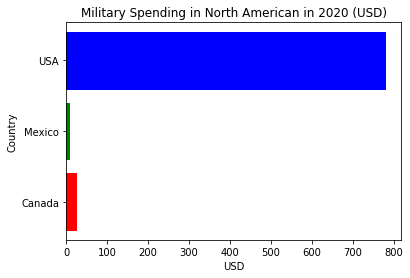

In [19]:
barh = plt.barh(y = year2020.index, width = year2020[2020], tick_label = ['Canada', 'Mexico', 'USA'])

barh[0].set_color('red')
barh[1].set_color('green')
barh[2].set_color('blue')

plt.title('Military Spending in North American in 2020 (USD)')
plt.xlabel('USD')
plt.ylabel('Country')
plt.show()

The same can be done for regular bar graphs made using `plt.bar()`. Depending on your visualization preferences, `plt.bar()` and `plt.barh()` provide multiple options for constructing a bar graph.

## Pie charts

Pie charts are a commonly used visualization method to represent proportions in datasets. Pie charts use *wedges* to represent the numerical value of a proportion corresponding to a categorial variable.

While pie charts are very common and can be easily interpreted by a layperson audience, they may not be the best way to represent data in certain cases. Firstly, because pie charts use the area of a circle to represent the proportion of a categorical variable, it can be difficult to gauge the numerical value that a wedge represents if the area doesn't appear as an easily discernible fraction (_e.g._ ½, ⅓, ¼). This can be aided with the help of labels and legends that explicitly show the numerical values associated with the wedges of the pie chart. Secondly, if you want to visualize many categorical variables or variables that make up a significantly small proportion of the dataset, it may be difficult to see the variable on a pie chart. Overall, pie charts can be a simple and effective way to communicate proportional categorical data, but before using them, consider what attributes of the data need to be highlighted to help decide if a pie chart is the most appropriate visualization method. 

We will shift our focus to a different dataset. This is a dataset of the number of suicides amongst youth ages 10-24 from the years 2000 to 2018 within east north central states (Illinois, Indiana, Michigan, Ohio, and Wisconsin). This data comes from a larger dataset gathered by the Center for Disease Control (CDC). More information on this dataset, as well as data from other states, can be found <a target="_blank" href="https://www.cdc.gov/nchs/products/databriefs/db471.htm">here</a>.

We will load the dataset below as `enc`:

In [3]:
enc = pd.read_csv("../../data/east-north-central_suicides.csv", index_col='Year')
enc

,Illinois,Indiana,Michigan,Ohio,Wisconsin
Year,,,,,
2000,155,112,138,151,109
2001,172,98,143,165,100
2002,168,104,150,168,112
2003,131,80,132,139,103
2004,160,99,148,199,111
2005,139,114,140,187,104
2006,135,98,124,183,71
2007,173,104,138,178,110
2008,144,94,146,202,80


Next, we will  make a pie chart using the `plt.pie()` function. We will use data from the year 2018 to visualize the proportions of suicide from each state in the region. We'll also set the figure size, in inches, using `plt.figure()`.

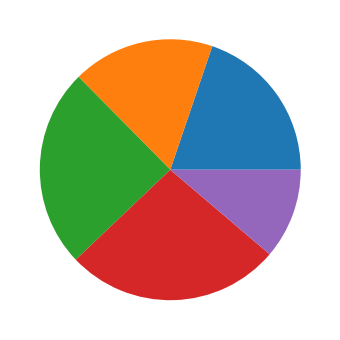

In [21]:
plt.figure(figsize=(10, 6))
plt.pie(enc.loc[2018])
plt.show()

Now that we have a pie chart, let's add some more detail to it to make it more descriptive.

We can label the wedges of the chart so that we know which state corresponds to which color. Likewise, we can label the percentage of each sector to know the definitive proportion of each state's contribution to the total number of suicides in 2018.

To do this, we will use the columns of `enc` and define it as `states`. We then will use `states` as an argument for the `labels` parameter within `plt.pie()` and specify formatting for the `autopct` parameter, which labels the wedges using the Python's formatting style. More information on that format can be found <a target="_blank" href="https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals">here</a>.

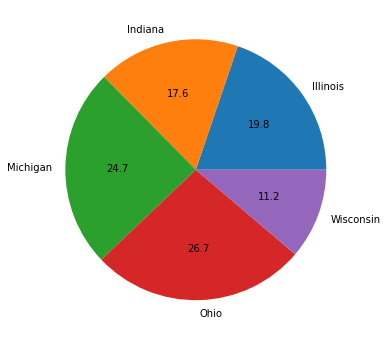

In [5]:
states = enc.columns
plt.figure(figsize=(10, 6))
plt.pie(enc.loc[2018], labels=states, autopct='%.1f')
plt.show()

This plot is okay, but it can be better.

The percentages may be difficult to see as the labeling competes with the color of the wedge. Instead, let's add the percentages into a legend along with the labels of each sector. Let's also add a title so others can know what they are looking at when they view this chart.

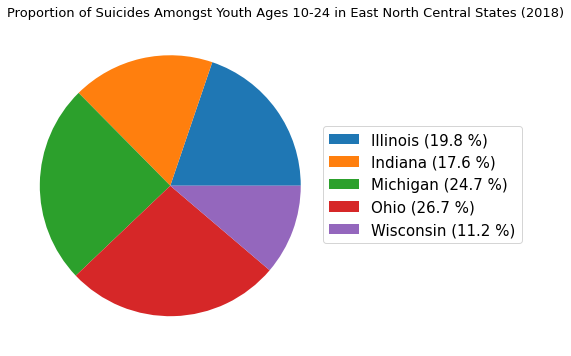

In [19]:
plt.figure(figsize=(10, 6))


patches, text = plt.pie(x = enc.loc[2018])
labels = ['Illinois (19.8 %)', 'Indiana (17.6 %)', 'Michigan (24.7 %)', 'Ohio (26.7 %)', 'Wisconsin (11.2 %)']


plt.legend(patches, labels, loc=4, bbox_to_anchor=(1.6, 0.3), fontsize=15)
plt.title("Proportion of Suicides Amongst Youth Ages 10-24 in East North Central States (2018)",  loc = 'left',
         fontsize = 13)


plt.show()

Above, we used `plt.pie()` in a way that we had not used it before.

Under the hood, the `plt.pie()` function returns two default outputs, which we named: `patches` and `text`. The size of each wedge is dictated by the `patches` object. The `text` object consists of a list of labels for our data. Here, we needed to specifically assign `patches` and `text` objects so we could use `patches` as an argument for the `plt.legend()` function. 

The `plt.legend()` function has two required arguments. The first argument dictates *what* is being labeled. In our case, the wedges of the pie chart (*i.e.* the `patches` object) are being labeled. The second argument dictates *how* things are labeled. Here, we simply created a variable called labels, which consists of the fiv strings for the five wedges:

In [20]:
labels

['Illinois (19.8 %)',
 'Indiana (17.6 %)',
 'Michigan (24.7 %)',
 'Ohio (26.7 %)',
 'Wisconsin (11.2 %)']

The other arguments, `bbox_to_anchor` and `fontsize`, are optional when using the `plt.legend()` function.

The argument `bbox_to_anchor` designates the position in the plotting area where the legend will be, while the `fontsize` argument dictates the font size, in points, of the legend text.

As mentioned previously, labeling can greatly enhance the efficiency of of a pie chart's ability to communicate information. Because some of the wedges are very similar in size, it can be hard to discern the numeric value associated with each state. Labeling each wedge with the percentage and associated category or making a legend that depicts this information leaves less room for ambiguity when it comes to the data.

## Conclusions

In this section, we were introduced to the `plt.bar()` and `plt.pie()` functions to construct bar plots and pie charts, respectively.

The `plt.bar()` function requires `x` and `height` arguments, which can be an array of number values, but other parameters can be included.

The `plt.pie()` function only requires an `x` argument as an array of values and has other parameters that can be utilized well.

Both of these types of visualizations are used for depicting categorical data.

As a reminder, when deciding on whether to use a pie chart, consider certain attributes of the data, such as the number of categorical variables or the size of the proportions to be plotted. Below is a list of functions with linked documentation for your reference and further reading:

- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html">plt.bar( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html">plt.pie( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html">plt.boxplot( )</a> 
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html">plt.title( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html">plt.ylim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html">plt.xlim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html">plt.ylabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html">plt.xlabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html">plt.xticks( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html">ax.bar( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html">ax.legend( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html">plt.tight_layout( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">plt.figure( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html">plt.show( )</a>